<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/6_Loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Домашнее задание
Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
Реализовать самостоятельно логистическую регрессию
Обучить ее методом градиентного спуска
Методом nesterov momentum
Методом rmsprop
В качестве dataset'а взять Iris, оставив 2 класса:
Iris Versicolor
Iris Virginic

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
# загружаем датасет и убираем первые 50 строк, оставляя только последние два класса
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns = data.feature_names)[50:]
y =  data.target[50:]

In [0]:
# делаем нормализацию данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

*** Реализация Логистической регрессии как отдельный Класс  LogisticRegressionMy с функциями fit, predict. 

Чтобы использовать матричное умножение numpy к данным добавляется вначале столбец 1

Функции градиентных спусков реализованы внутри класса, в зависимости от передаваемого метода в функцию fit***

In [0]:
class LogisticRegressionMy():

  params = None
  N_class = None
  preds = []
  costs = []
  accurate = None
  _predG = 0
  _predG2 = 0
  _yG = 0
  _eps = 0 

  def fit(self, X, y, method = 'base', iter = 500):
    X_ = self.addCol(X)
    self.N_class = np.unique(y)
    self.params =np.ones((len(self.N_class), X_.shape[0]))
    result = np.array([[ 1.0*(j == y[i]) for j in self.N_class] for i in range(len(y))]).T
    self.costs = []
    self.preds = []
    _predG = 0
    _predG2 = 0
    _eps = 0

    for _ in range( 1, iter):
      predictions = np.dot(self.params, X_)
      self.preds.append(predictions)

      delta = predictions - result
      cost = np.sum(np.square(np.dot(delta.T,delta)))/( 2*predictions.shape[1])
      self.costs.append(cost)

      i = np.random.choice(X_.shape[1])
      delta = np.dot(self.params, X_[:,i]) - result[:,i]
      self.params = self.params - self.spusk(delta, X_[:,i], method)
  
  def addCol(self, X):
    return np.column_stack((np.ones(X.shape[0]), X)).T

  def predict(self, X):
    X_ = self.addCol(X) 
    return np.dot(self.params, X_)
     
  
  def score(self, X_test, y_test):
    y = self.predict(X_test)
    self.accurate = np.sum([(self.N_class[np.argmax(y[:,i])] == y_test[i])*1 for i in range(X_test.shape[0])])/len(y_test)
    return self.accurate

  def spusk(self, delta, x, method, learning_rate = 0.05):
    if method == 'base':
      return self.spusk_base(delta, x, learning_rate)
    elif method == 'nesterov':
      return self.spusk_nesterov(delta, x, learning_rate)
    elif method == 'rmsprop':
      return self.spusk_rmsprop(delta, x, learning_rate) 

  def spusk_base(self, delta, x, learning_rate):
    return learning_rate* np.outer(delta, x)
    
  def spusk_nesterov(self, delta, x, learning_rate):
    if self._yG == 0: 
      self._yG = 0.5  
    self._predG = self._yG * self._predG + learning_rate* np.outer(delta, x) 
    return self._predG

  def spusk_rmsprop(self, delta, x, learning_rate):
    if self._yG == 0: 
      self._yG = 0.5
    if self._eps == 0: 
      self._eps = 0.005  
    self._predG = np.outer(delta, x)  
    self._predG2 = self._yG * self._predG2 + ( 1 - self._yG) * self._predG**2
    self._predG = learning_rate * self._predG / np.sqrt(self._predG2 + self._eps)
    return self._predG       


Точность предсказания класса  0.92


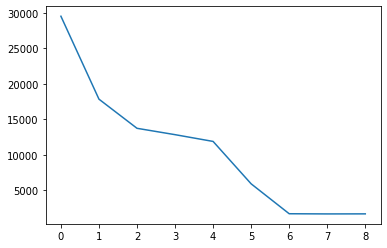

In [101]:
lrm = LogisticRegressionMy()
lrm.fit(X_scale, y, 'base', 10)
print('Точность предсказания класса ', lrm.score(X_scale, y))
plt.plot( range(len(lrm.costs)), lrm.costs)
plt.show()

Точность предсказания класса  0.95


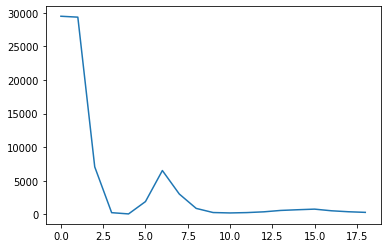

In [115]:
lrm = LogisticRegressionMy()
lrm._yG = 0.9
lrm.fit(X_scale, y, 'nesterov', 20)
print('Точность предсказания класса ', lrm.score(X_scale, y))
plt.plot( range(len(lrm.costs)), lrm.costs)
plt.show()

Точность предсказания класса  0.9


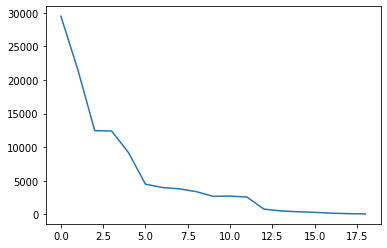

In [137]:
lrm = LogisticRegressionMy()
lrm._yG = 0.9
lrm.fit(X_scale, y, 'rmsprop', 20)
print('Точность предсказания класса ', lrm.score(X_scale, y))
plt.plot( range(len(lrm.costs)), lrm.costs)
plt.show()